In [ ]:
%pip install torch torchvision torchaudio

In [10]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import PILToTensor, ToTensor
from torchvision.datasets import VOCSegmentation
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


#transformation class
class ToTensorPair:
    def __call__(self, image, target):
        image = ToTensor()(image)
        target = torch.from_numpy(np.array(target)).long()
        return image, target
    

data_root = '/Users/sarayumum/Desktop/ucdavis/ecs171/subject-isolation/dataset'
transform = ToTensorPair()
train_dataset = VOCSegmentation(
    root=data_root,
    year="2012",
    image_set="train",
    download=True, 
    transforms=transform
)

val_dataset = VOCSegmentation(
    root=data_root,
    year="2012",
    image_set="val",
    download=True, 
    transforms=transform
)

BATCH_SIZE = 8

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

print("Data Loaded")

Data Loaded


In [11]:
image, mask = train_dataset[0]
print("Image shape:", image.shape) 
print("Mask shape:", mask.shape) 

Image shape: torch.Size([3, 281, 500])
Mask shape: torch.Size([281, 500])


In [12]:
image_perumated = image.permute(1, 2, 0)
print("Image shape:", image_perumated)

Image shape: tensor([[[0.5137, 0.7569, 0.8157],
         [0.5137, 0.7569, 0.8157],
         [0.5137, 0.7569, 0.8157],
         ...,
         [0.7137, 0.9098, 0.9451],
         [0.7137, 0.9098, 0.9451],
         [0.7137, 0.9098, 0.9451]],

        [[0.5176, 0.7608, 0.8196],
         [0.5176, 0.7608, 0.8196],
         [0.5216, 0.7647, 0.8235],
         ...,
         [0.7176, 0.9137, 0.9490],
         [0.7176, 0.9137, 0.9490],
         [0.7137, 0.9098, 0.9451]],

        [[0.5216, 0.7647, 0.8235],
         [0.5216, 0.7647, 0.8235],
         [0.5255, 0.7686, 0.8275],
         ...,
         [0.7176, 0.9137, 0.9490],
         [0.7176, 0.9137, 0.9490],
         [0.7137, 0.9098, 0.9451]],

        ...,

        [[0.0235, 0.0588, 0.0549],
         [0.0196, 0.0549, 0.0510],
         [0.0275, 0.0510, 0.0510],
         ...,
         [0.0627, 0.1333, 0.1490],
         [0.0627, 0.1333, 0.1490],
         [0.0627, 0.1333, 0.1490]],

        [[0.0196, 0.0549, 0.0510],
         [0.0353, 0.0706, 0.0667],

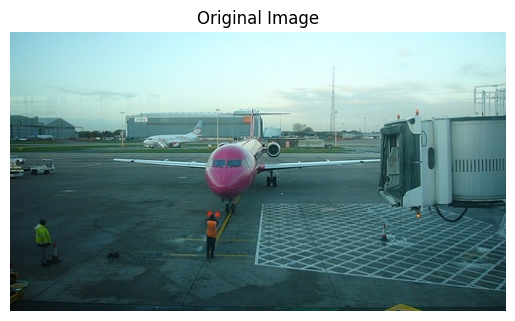

In [50]:
plt.imshow(image_perumated.numpy())
plt.axis('off')
plt.title("Original Image")
plt.show()

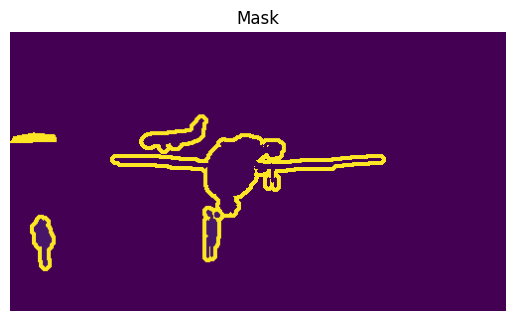

In [59]:
plt.imshow(mask.numpy())
plt.axis('off')
plt.title("Mask")
plt.show()

In [13]:
image_reshaped = image_perumated.reshape(-1, 3)
print("Image:", image_reshaped)
print("Image shape:", image_reshaped.shape)

Image: tensor([[0.5137, 0.7569, 0.8157],
        [0.5137, 0.7569, 0.8157],
        [0.5137, 0.7569, 0.8157],
        ...,
        [0.0627, 0.1294, 0.1569],
        [0.0471, 0.1137, 0.1412],
        [0.0667, 0.1333, 0.1608]])
Image shape: torch.Size([140500, 3])


In [14]:
image_pixels = np.float32(image_reshaped)
print(image_pixels)

classes = 21 #number of classes + background
num_pixels = len(image_pixels)
indices = np.random.choice(num_pixels, classes, replace=False)
centers = image_pixels[indices]
print(centers)

[[0.5137255  0.75686276 0.8156863 ]
 [0.5137255  0.75686276 0.8156863 ]
 [0.5137255  0.75686276 0.8156863 ]
 ...
 [0.0627451  0.12941177 0.15686275]
 [0.04705882 0.11372549 0.14117648]
 [0.06666667 0.13333334 0.16078432]]
[[0.7176471  0.91764706 0.93333334]
 [0.20392157 0.37254903 0.39607844]
 [0.33333334 0.4862745  0.48235294]
 [0.3019608  0.4392157  0.45490196]
 [0.48235294 0.63529414 0.6313726 ]
 [0.21960784 0.3764706  0.38431373]
 [0.85882354 0.99215686 1.        ]
 [0.78039217 0.972549   0.99215686]
 [0.6039216  0.78039217 0.8039216 ]
 [0.1254902  0.23921569 0.2627451 ]
 [0.45490196 0.60784316 0.6039216 ]
 [0.32156864 0.47843137 0.50980395]
 [0.654902   0.7529412  0.7411765 ]
 [0.8666667  1.         1.        ]
 [0.72156864 0.8235294  0.78039217]
 [0.43137255 0.61960787 0.63529414]
 [0.20392157 0.36078432 0.36078432]
 [0.83137256 0.9882353  0.9882353 ]
 [0.6313726  0.85490197 0.8980392 ]
 [0.11764706 0.2        0.21176471]
 [0.74509805 0.9529412  0.9843137 ]]


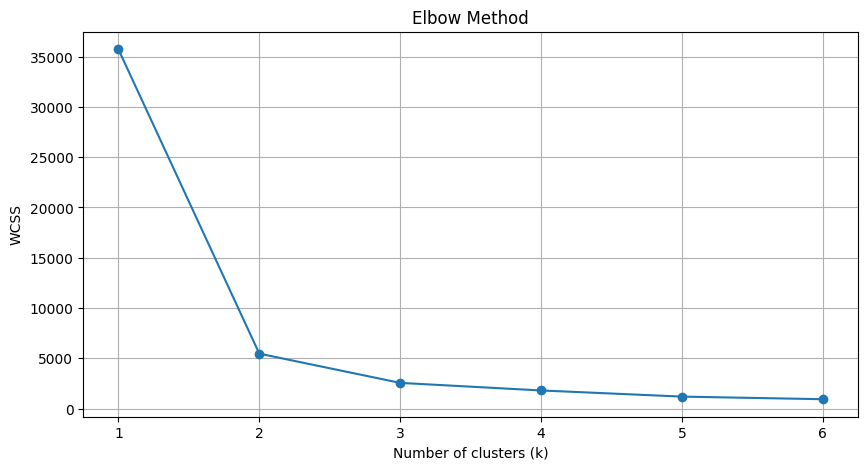

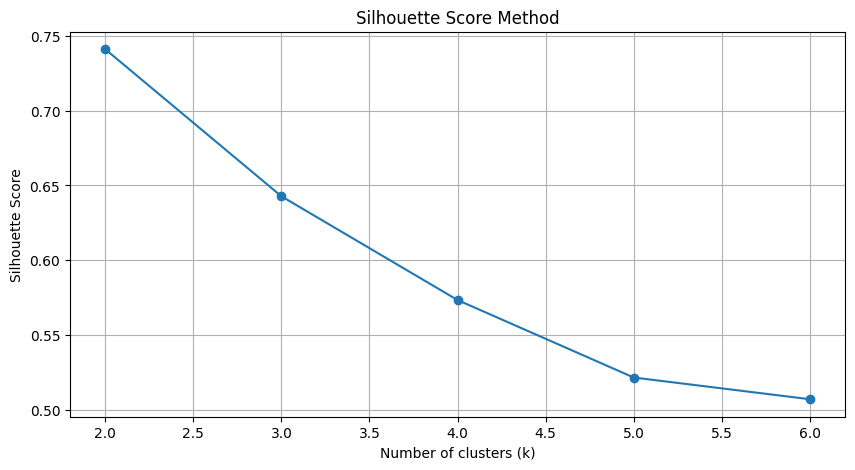

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pixel_scaled = scaler.fit_transform(image_pixels)

wcss = []
silhouette_scores = []

for k in range(1,7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixel_scaled)
    wcss.append(kmeans.inertia_)

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(pixel_scaled)
    score = silhouette_score(pixel_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(1,7), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [40]:
from sklearn.cluster import KMeans

MAX_ITERATIONS = 50

def kmeans(pixels, k):
    # Initialize centroids randomly
    num_pixels = len(pixels)
    indices = np.random.choice(num_pixels, k, replace=False)
    centroids = pixels[indices]
    print(centroids)
    
    iterations = 0
    old_centroids = None
    # run the main k-means algorithm
    while not stop(old_centroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        old_centroids = centroids
        iterations += 1
        # Assign labels to each datapoint based on centroids
        labels = get_labels(pixels, centroids)
        # Assign centroids based on datapoint labels
        centroids = get_centroids(pixels, labels, k, centroids)
        
    return centroids, labels

def stop(old_centroids, centroids, iterations):
    if iterations > MAX_ITERATIONS:
        return True
    if old_centroids is None:
        return False
    return np.array_equal(old_centroids, centroids)

def get_labels(pixels, centroids):
    labels = []
    for pixel in pixels:
        distances = [get_distance(pixel, centroid) for centroid in centroids]
        label = np.argmin(distances)
        labels.append(label)
    return np.array(labels)
        
def get_centroids(pixels, labels, k, old_centroids):
    centroids = []
    for i in range(k):
        if np.any(labels == i):
            centroid = np.mean(pixels[labels == i], axis=0)
        else:
            centroid = old_centroids[i]
        centroids.append(centroid)
    return np.array(centroids)

def get_distance(pixel, centroid):
    x1, y1, z1 = pixel[0], pixel[1], pixel[2]
    x2, y2, z2 = centroid[0], centroid[1], centroid[2]
    return np.sqrt(np.sum([(x1-x2)**2, (y1-y2)**2, (z1-z2)**2]))

In [42]:
k = 2
cluster_centers, labels = kmeans(image_pixels, k)
print(cluster_centers, labels)

[[0.0627451  0.21176471 0.22352941]
 [0.15686275 0.3019608  0.3372549 ]]
[[0.20471169 0.32728302 0.33798313]
 [0.75178665 0.8996373  0.8952805 ]] [1 1 1 ... 0 0 0]


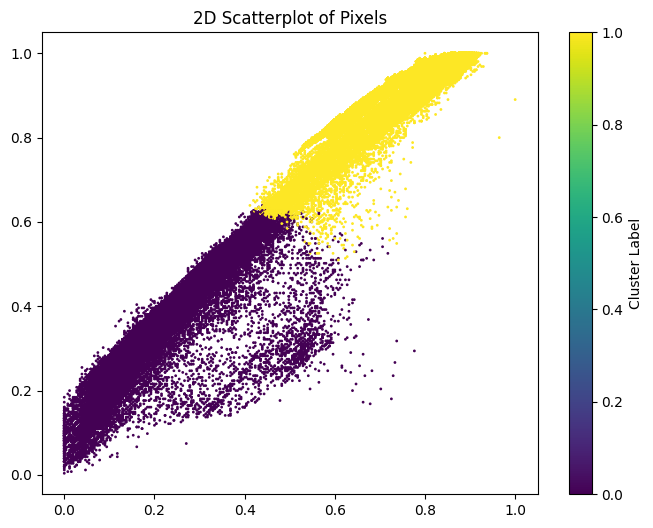

In [47]:
#make the visualizations for the clusters
plt.figure(figsize=(8, 6))
plt.scatter(image_pixels[:, 0], image_pixels[:, 1], c=labels, cmap='viridis', s=1)
plt.title("2D Scatterplot of Pixels")
plt.colorbar(label="Cluster Label")
plt.show()

In [55]:
#replace the pixels with the cluster center color
for i in range(k):
    if np.any(labels == i):
        image_pixels[labels == i] = cluster_centers[i]

H, W = image_perumated.shape[:2]
image_result = torch.from_numpy(image_pixels)
image_result = image_result.reshape(H, W, 3)
print(image_result)

tensor([[[0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         ...,
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953]],

        [[0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         ...,
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953]],

        [[0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         ...,
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953],
         [0.7518, 0.8996, 0.8953]],

        ...,

        [[0.2047, 0.3273, 0.3380],
         [0.2047, 0.3273, 0.3380],
         [0.2047, 0.3273, 0.3380],
         ...,
         [0.2047, 0.3273, 0.3380],
         [0.2047, 0.3273, 0.3380],
         [0.2047, 0.3273, 0.3380]],

        [[0.2047, 0.3273, 0.3380],
         [0.2047, 0.3273, 0.3380],
         [0.

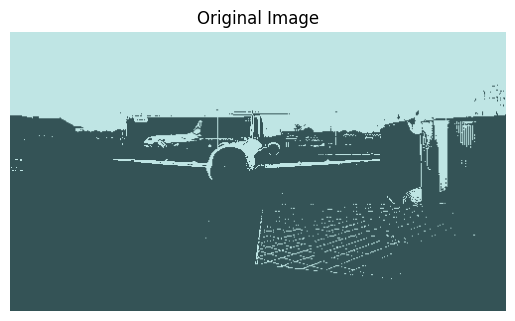

In [56]:
plt.imshow(image_result.numpy())
plt.axis('off')
plt.title("")
plt.show()